In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
data = pd.read_csv('imgs/log.csv')
try:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [float(si) for si in s.split(":")])
except:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [0])
data.head()

,Generation,BestEval,FlatWeights
0,1,0.131997,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,100,0.393454,"[0.0026, -0.0015, 0.0, -0.0051, -0.0023, 0.0, ..."
2,200,0.588465,"[0.0026, -0.0015, -0.0044, -0.0108, -0.0083, 0..."
3,300,0.804377,"[0.0026, -0.0008, -0.002, -0.0148, -0.0083, 0...."
4,400,1.080812,"[0.0125, 0.0025, -0.002, -0.0185, -0.0083, 0.0..."


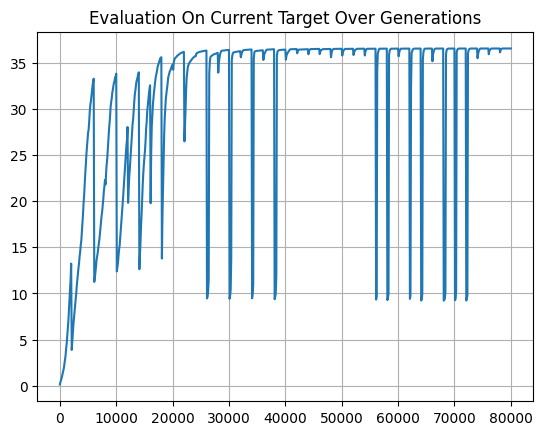

In [3]:
plt.plot(data["Generation"], data["BestEval"])
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.show()

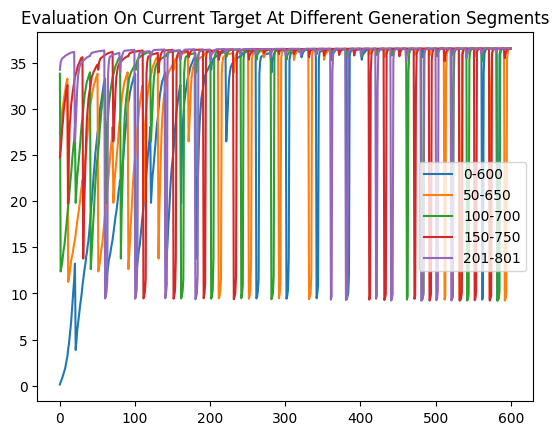

In [4]:
width = 600
graph_num = 5
graph_points = np.linspace(0, len(data["Generation"])-width, graph_num)
for start in graph_points:
    ys = data["BestEval"][int(start):int(start+width)]
    xs = np.linspace(0, len(ys), len(ys))
    plt.plot(xs, ys, label="%s-%s"%(int(start), int(start+width)))
plt.legend()
plt.title("Evaluation On Current Target At Different Generation Segments")
plt.show()

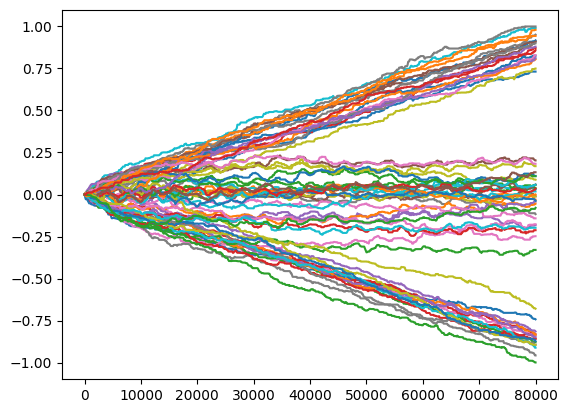

In [5]:
weights_seqs = [[] for _ in range(len(data["FlatWeights"][0]))]
for weights in data["FlatWeights"]:
    for i, w in enumerate(weights):
        weights_seqs[i].append(w)

for ws in weights_seqs:
    plt.plot(data["Generation"], ws)
plt.show()

In [6]:
ddf = pd.read_csv("imgs/d.csv")
ddf["Vals"] = ddf["Vals"].apply(lambda s: [float(si) for si in s.split(":")])
ddf.head()

,Id,Timestep,Vals
0,0,0,"[0.016724, -0.78064, 0.993084, -0.30274, -0.77..."
1,0,1,"[0.508453, -1.371185, 1.552493, -0.800183, 0.1..."
2,0,2,"[1.33834, -2.096409, 2.241228, -1.607836, 1.10..."
3,0,3,"[2.069287, -2.677127, 2.792981, -2.285999, 1.8..."
4,0,4,"[2.655384, -3.141701, 3.234385, -2.828795, 2.5..."


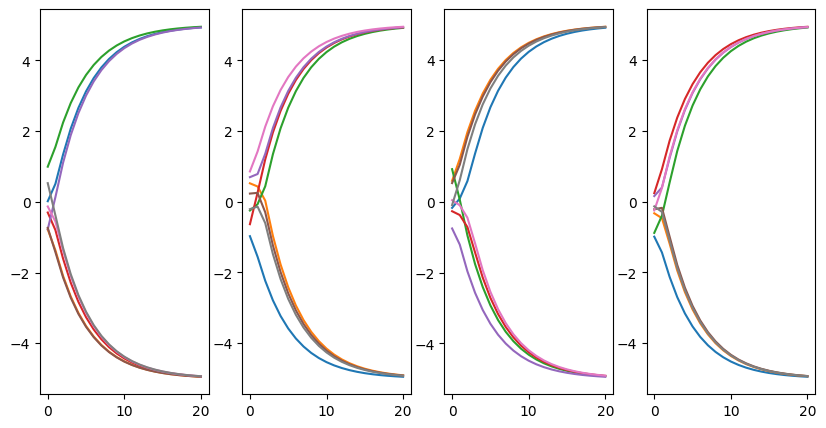

In [7]:
uids = list(ddf["Id"].unique())
fig, axs = plt.subplots(1, len(uids), figsize=(10, 5))
idi = 0
for id in uids:
    ddf_id = ddf[ddf["Id"] == id]
    num_vals = len(list(ddf_id["Vals"])[0])
    vals_seqs = [[] for _ in range(num_vals)]
    for vals in ddf_id["Vals"]:
        for i, v in enumerate(vals):
            vals_seqs[i].append(v)
    for vs in vals_seqs:
        axs[idi].plot(ddf_id["Timestep"], vs)
    idi+=1
plt.show()

evolved


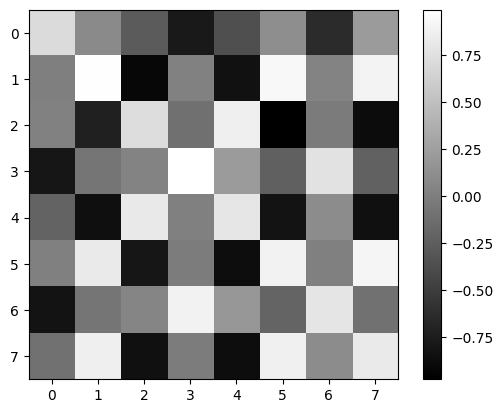

hebbian


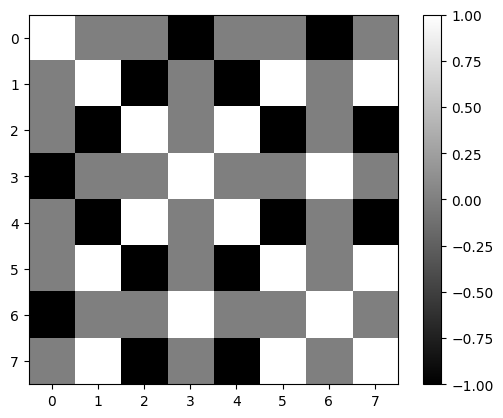

In [8]:
img_ev = np.array(Image.open("imgs/evo_weights_max1.png"))/255.0*2-1
img_hebb = np.array(Image.open("imgs/hebb_weights_max1.png"))/255.0*2-1

print("evolved")
plt.imshow(img_ev, cmap="gray")
plt.colorbar()
plt.show()
print("hebbian")
plt.imshow(img_hebb, cmap="gray")
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


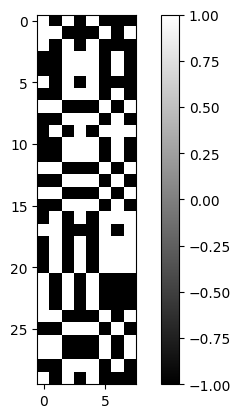

In [9]:
img_fig12e = np.array(Image.open("imgs/evo_fig12e.png"))/255.0*2-1
plt.imshow(img_fig12e, cmap="gray", vmin=-1, vmax=1)
plt.colorbar()
plt.show()